In [264]:
!pip install kaggle

In [265]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory


In [266]:
!chmod 600 /content/kaggle.json

chmod: cannot access '/content/kaggle.json': No such file or directory


In [267]:
! kaggle datasets download shashwatwork/dataco-smart-supply-chain-for-big-data-analysis

Dataset URL: https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis
License(s): CC0-1.0
dataco-smart-supply-chain-for-big-data-analysis.zip: Skipping, found more recently modified local copy (use --force to force download)


In [268]:
from zipfile import ZipFile

file = 'dataco-smart-supply-chain-for-big-data-analysis.zip'

with ZipFile(file, 'r') as zip:
  zip.extractall()
  print('Done')

Done


#Import packages

In [269]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [270]:
df = pd.read_csv('/content/DataCoSupplyChainDataset.csv', encoding='latin1')
# or alternatively try 'ISO-8859-1'
# df = pd.read_csv('/content/DataCoSupplyChainDataset.csv', encoding='ISO-8859-1')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [271]:
df.shape

(180519, 53)

In [272]:
df.isnull().sum()

,0
Type,0
Days for shipping (real),0
Days for shipment (scheduled),0
Benefit per order,0
Sales per customer,0
Delivery Status,0
Late_delivery_risk,0
Category Id,0
Category Name,0
Customer City,0


In [273]:
df['Customer Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [274]:
df['Product Description'].unique()

array([nan])

In [275]:
df['Category Name'].unique()

array(['Sporting Goods', 'Cleats', 'Shop By Sport', "Women's Apparel",
       'Electronics', 'Boxing & MMA', 'Cardio Equipment', 'Trade-In',
       "Kids' Golf Clubs", 'Hunting & Shooting', 'Baseball & Softball',
       "Men's Footwear", 'Camping & Hiking', 'Consumer Electronics',
       'Cameras ', 'Computers', 'Basketball', 'Soccer', "Girls' Apparel",
       'Accessories', "Women's Clothing", 'Crafts', "Men's Clothing",
       'Tennis & Racquet', 'Fitness Accessories', 'As Seen on  TV!',
       'Golf Balls', 'Strength Training', "Children's Clothing",
       'Lacrosse', 'Baby ', 'Fishing', 'Books ', 'DVDs', 'CDs ', 'Garden',
       'Hockey', 'Pet Supplies', 'Health and Beauty', 'Music',
       'Video Games', 'Golf Gloves', 'Golf Bags & Carts', 'Golf Shoes',
       'Golf Apparel', "Women's Golf Clubs", "Men's Golf Clubs", 'Toys',
       'Water Sports', 'Indoor/Outdoor Games'], dtype=object)

In [276]:
df['Order Region'].unique()

array(['Southeast Asia', 'South Asia', 'Oceania', 'Eastern Asia',
       'West Asia', 'West of USA ', 'US Center ', 'West Africa',
       'Central Africa', 'North Africa', 'Western Europe',
       'Northern Europe', 'Central America', 'Caribbean', 'South America',
       'East Africa', 'Southern Europe', 'East of USA', 'Canada',
       'Southern Africa', 'Central Asia', 'Eastern Europe',
       'South of  USA '], dtype=object)

In [277]:
df['Order Status'].unique()

array(['COMPLETE', 'PENDING', 'CLOSED', 'PENDING_PAYMENT', 'CANCELED',
       'PROCESSING', 'SUSPECTED_FRAUD', 'ON_HOLD', 'PAYMENT_REVIEW'],
      dtype=object)

In [278]:
df['Order Status'][df['Order Status']=='SUSPECTED_FRAUD'].count()

4062

In [279]:
df.dtypes

,0
Type,object
Days for shipping (real),int64
Days for shipment (scheduled),int64
Benefit per order,float64
Sales per customer,float64
Delivery Status,object
Late_delivery_risk,int64
Category Id,int64
Category Name,object
Customer City,object


In [280]:
# 1. Clean 'Order Item Total' and convert to numeric
df_plot = df.copy()
df_plot['Order Item Total'] = df_plot['Order Item Total'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
df_plot['Order Item Total'] = pd.to_numeric(df_plot['Order Item Total'], errors='coerce')

# 2. Filter out rows with missing or invalid 'Order Item Total'
df_plot = df_plot.dropna(subset=['Order Item Total'])

# 3. Convert 'Order Item Total' to float
df_plot['Order Item Total'] = df_plot['Order Item Total'].astype(float)


# Data Visualization

In [281]:
!pip install --upgrade seaborn

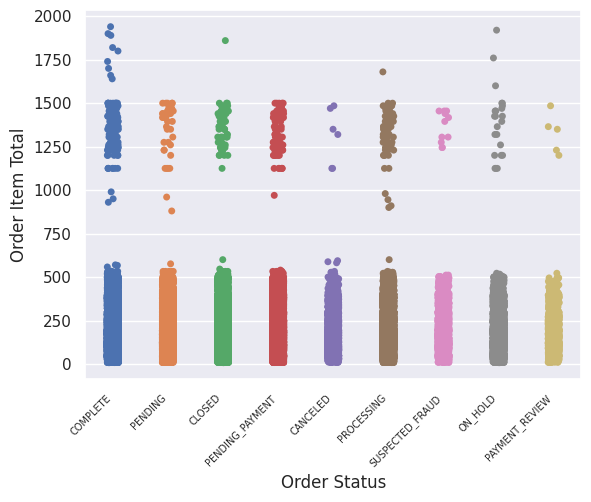

In [282]:
sns.stripplot(x='Order Status', y='Order Item Total', hue='Order Status', data=df_plot)
plt.xticks(fontsize=7)
plt.xticks(rotation=45, ha='right')
plt.show()

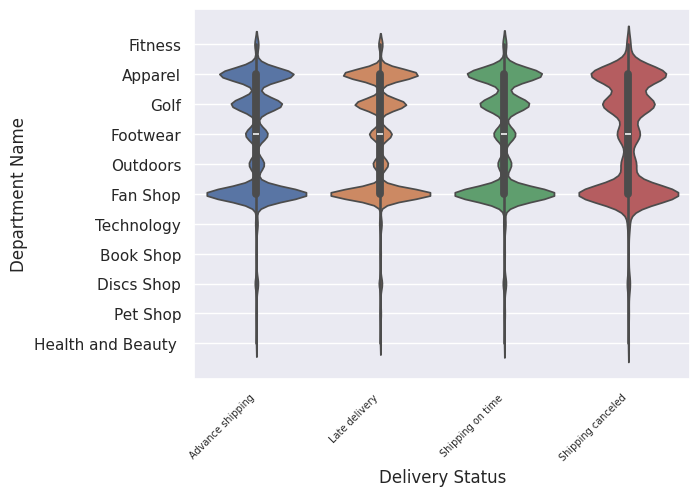

In [283]:
sns.violinplot(x='Delivery Status', y='Department Name', hue='Delivery Status', data=df_plot)
plt.xticks(fontsize=7)
plt.xticks(rotation=45, ha='right')
plt.show()

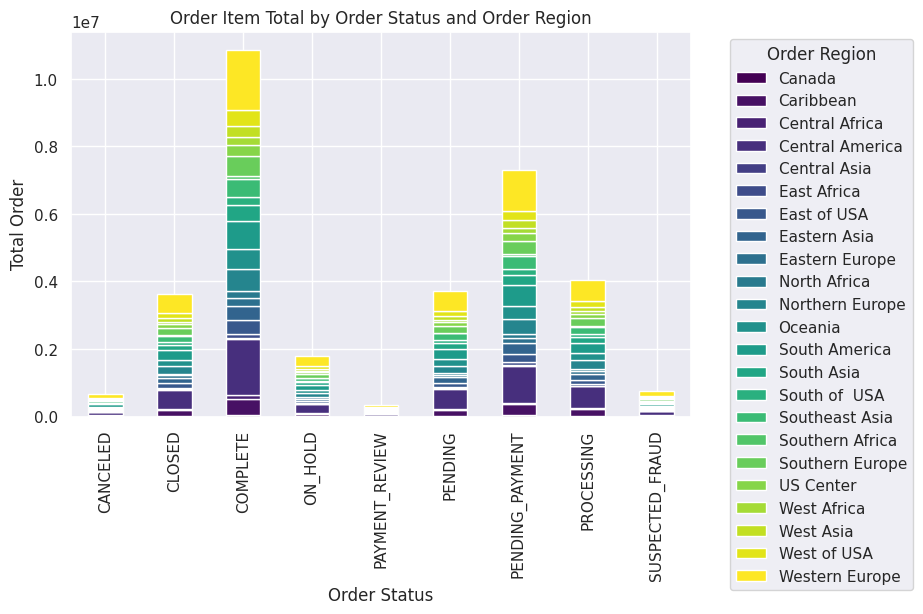

In [284]:
df_grouped = df.groupby(['Order Status', 'Order Region'])['Order Item Total'].sum().unstack()

df_grouped.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8,5))
plt.xlabel("Order Status")
plt.ylabel("Total Order")
plt.title("Order Item Total by Order Status and Order Region")
plt.legend(title="Order Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


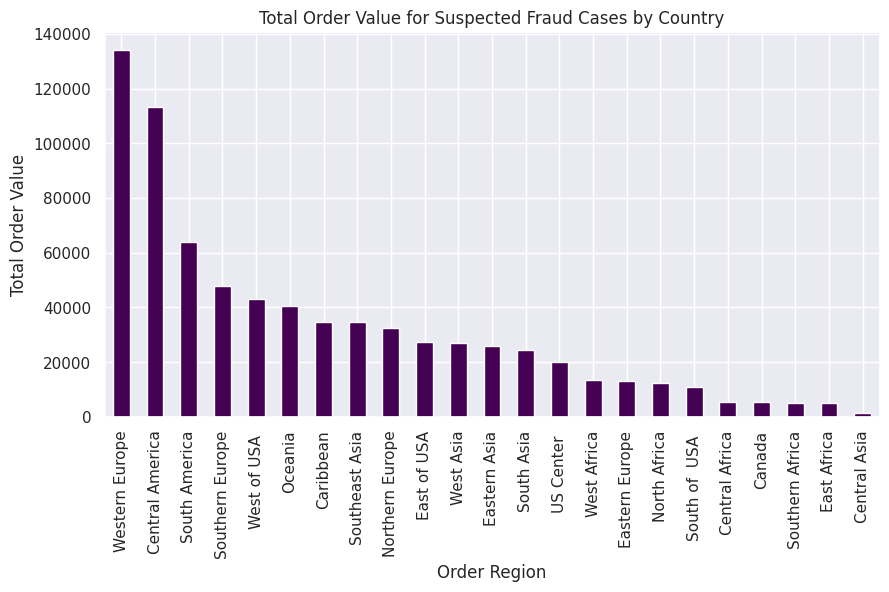

In [285]:
df_suspected = df[df['Order Status'] == 'SUSPECTED_FRAUD']

df_grouped_suspected = df_suspected.groupby('Order Region')['Order Item Total'].sum().sort_values(ascending=False)

ax = df_grouped_suspected.plot(kind='bar', stacked= True, colormap='viridis', figsize=(10, 5))

plt.xlabel("Order Region")
plt.ylabel("Total Order Value")
plt.title("Total Order Value for Suspected Fraud Cases by Country")
plt.xticks(rotation=90)

plt.show()


#Order profit

####Order profit trend

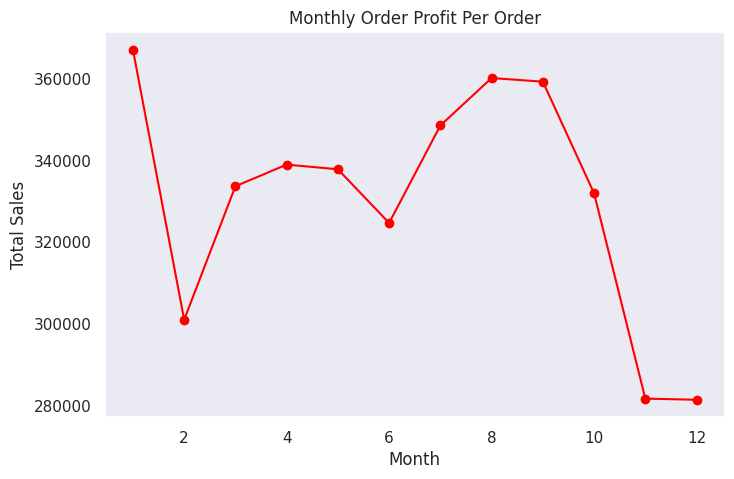

In [286]:
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
df_grouped = df.groupby(df['order date (DateOrders)'].dt.month)['Order Profit Per Order'].sum()

df_grouped.plot(kind='line', marker='o', color='red', figsize=(8,5))
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Order Profit Per Order")
plt.grid()
plt.show()


In [287]:
df_grouped.isnull().sum()

0

###### Order profit by category

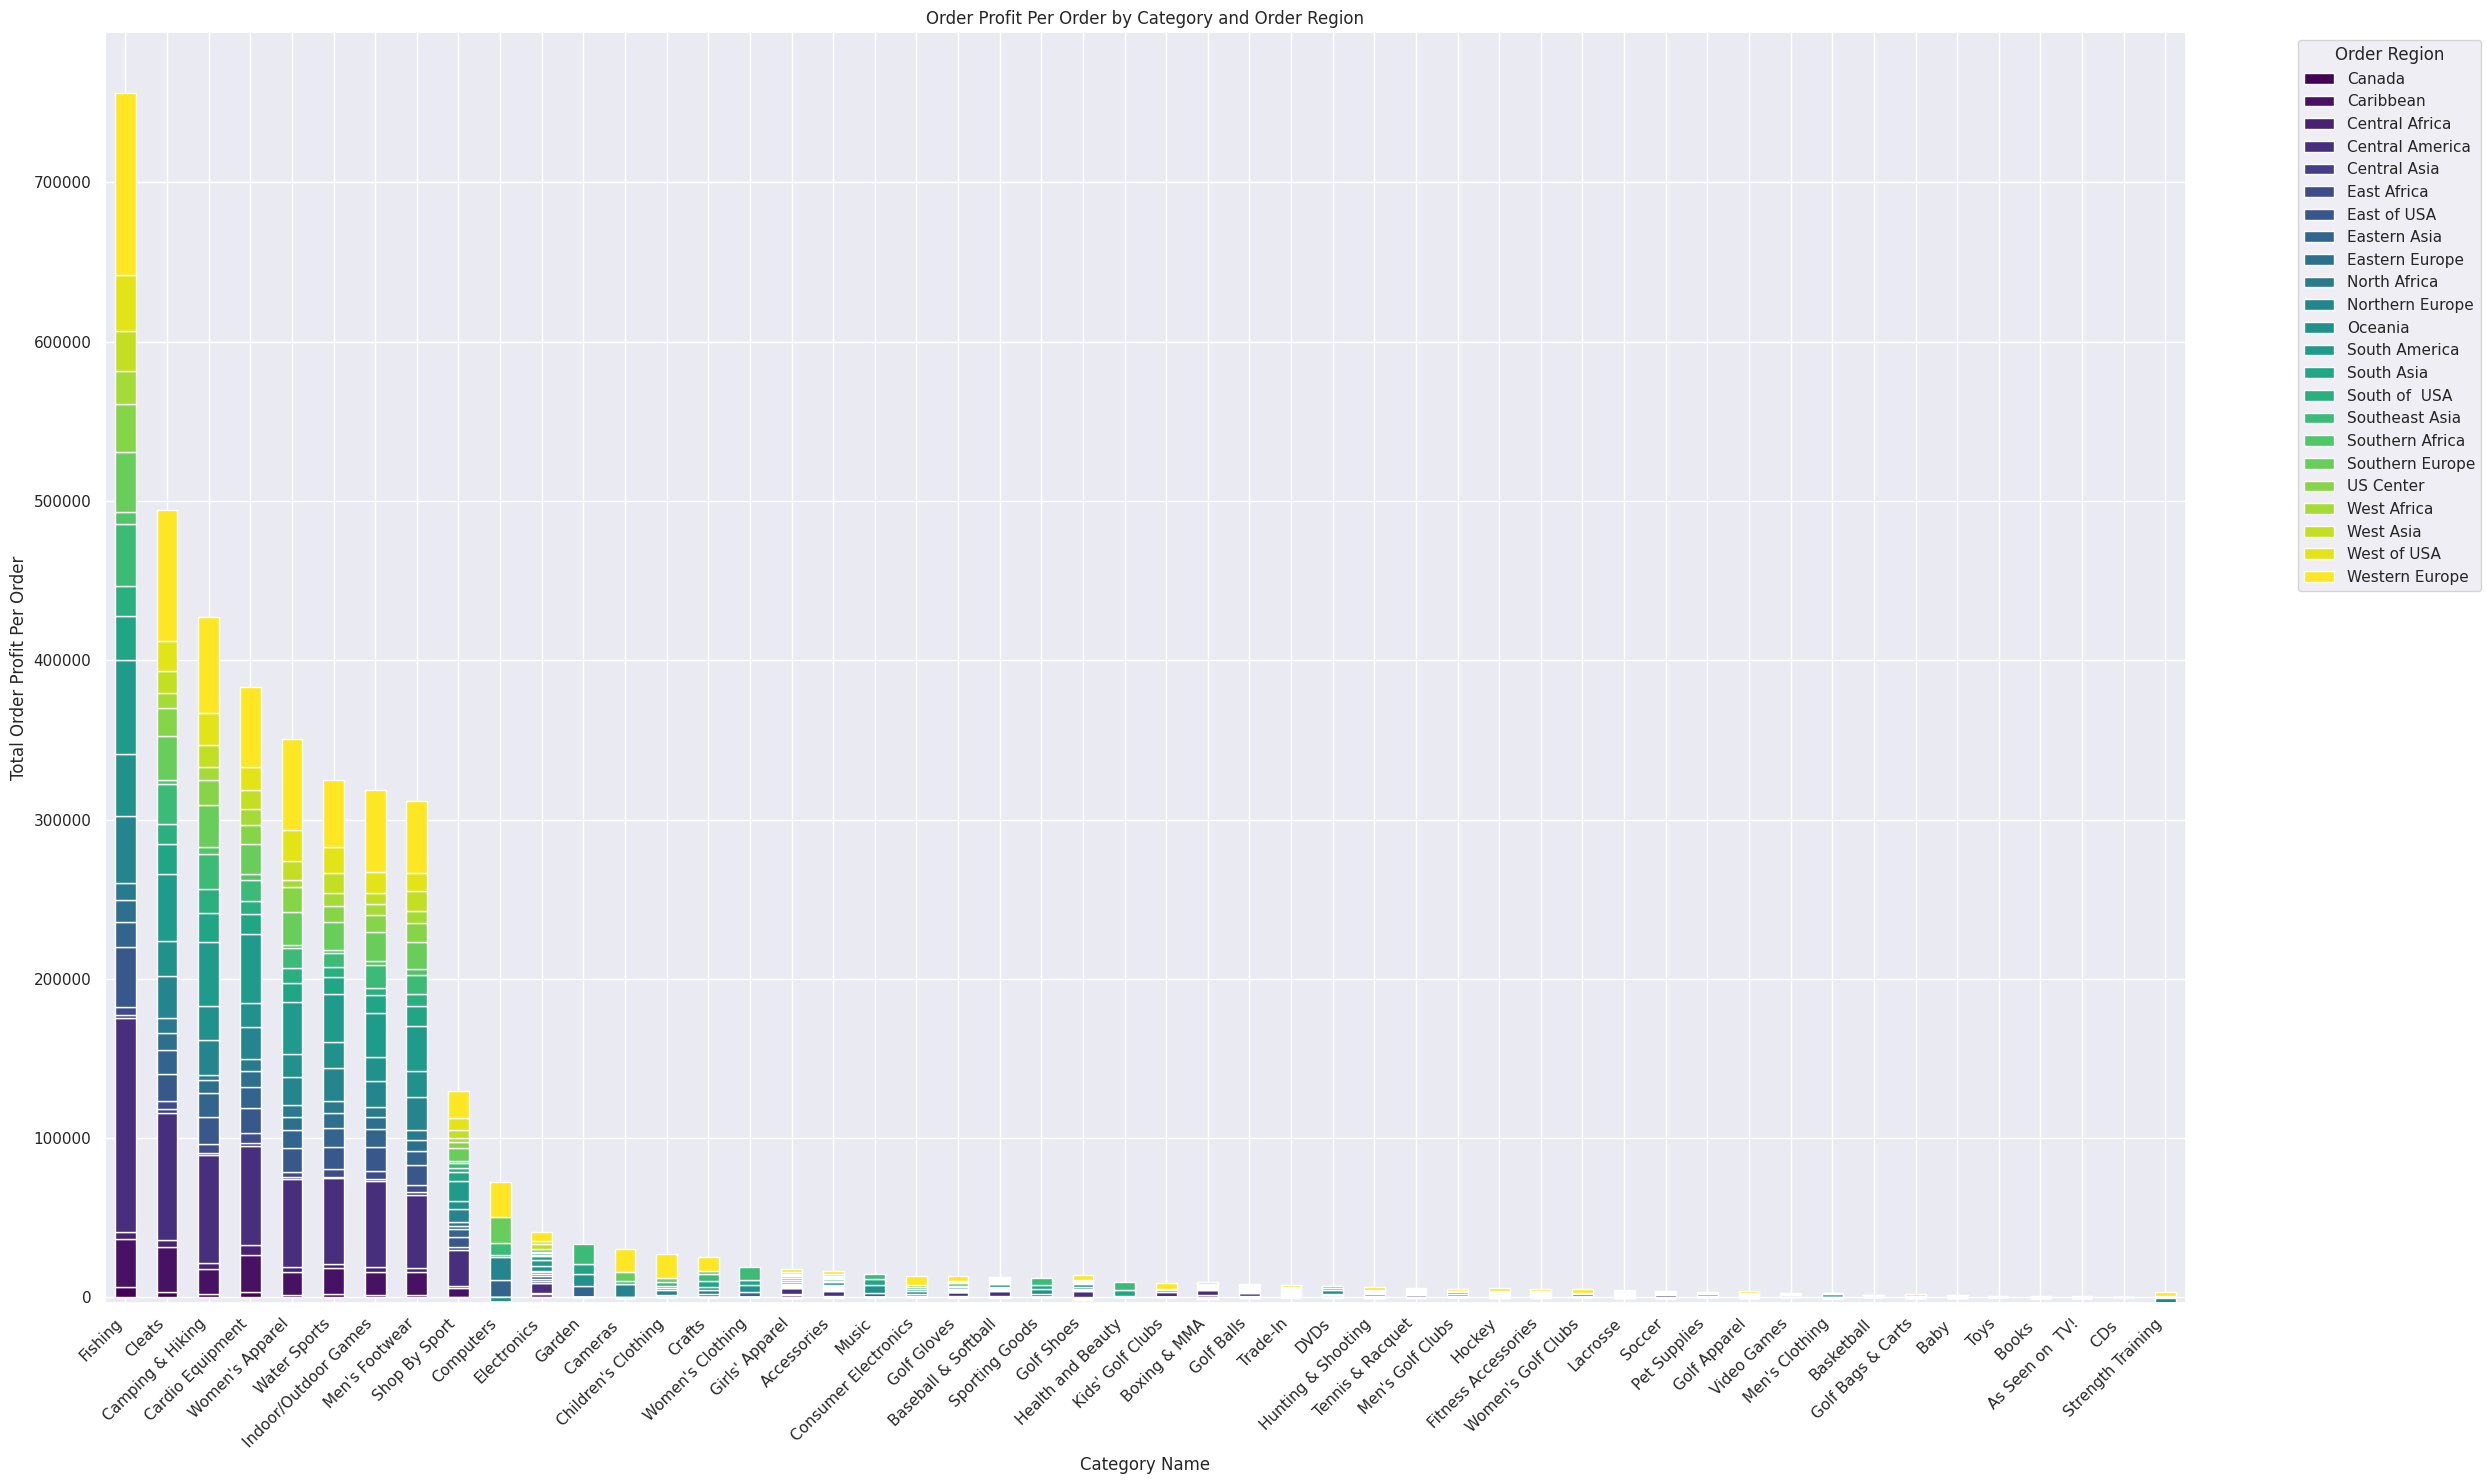

In [288]:
df_grouped = df.groupby(['Category Name', 'Order Region'])['Order Profit Per Order'].sum().unstack()
df_grouped = df_grouped.fillna(0)  # Replace NaN values with 0 to ensure all data is numeric
df_grouped = df_grouped[df_grouped.applymap(np.isreal).all(1)] # Filter out rows containing non-numeric values

# Sort the DataFrame by the sum of 'Order Profit Per Order' across all regions
df_grouped['Total'] = df_grouped.sum(axis=1)
df_grouped = df_grouped.sort_values(by=['Total'], ascending=False)
del df_grouped['Total']  # Remove the temporary 'Total' column

df_grouped.plot(kind='bar', stacked=True, colormap='viridis', figsize=(25, 15))
plt.xlabel("Category Name")  # Set x-axis label to 'Category Name'
plt.ylabel("Total Order Profit Per Order")  # Set y-axis label
plt.title("Order Profit Per Order by Category and Order Region")  # Set a more descriptive title
plt.legend(title="Order Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

#### No.of orders by Region

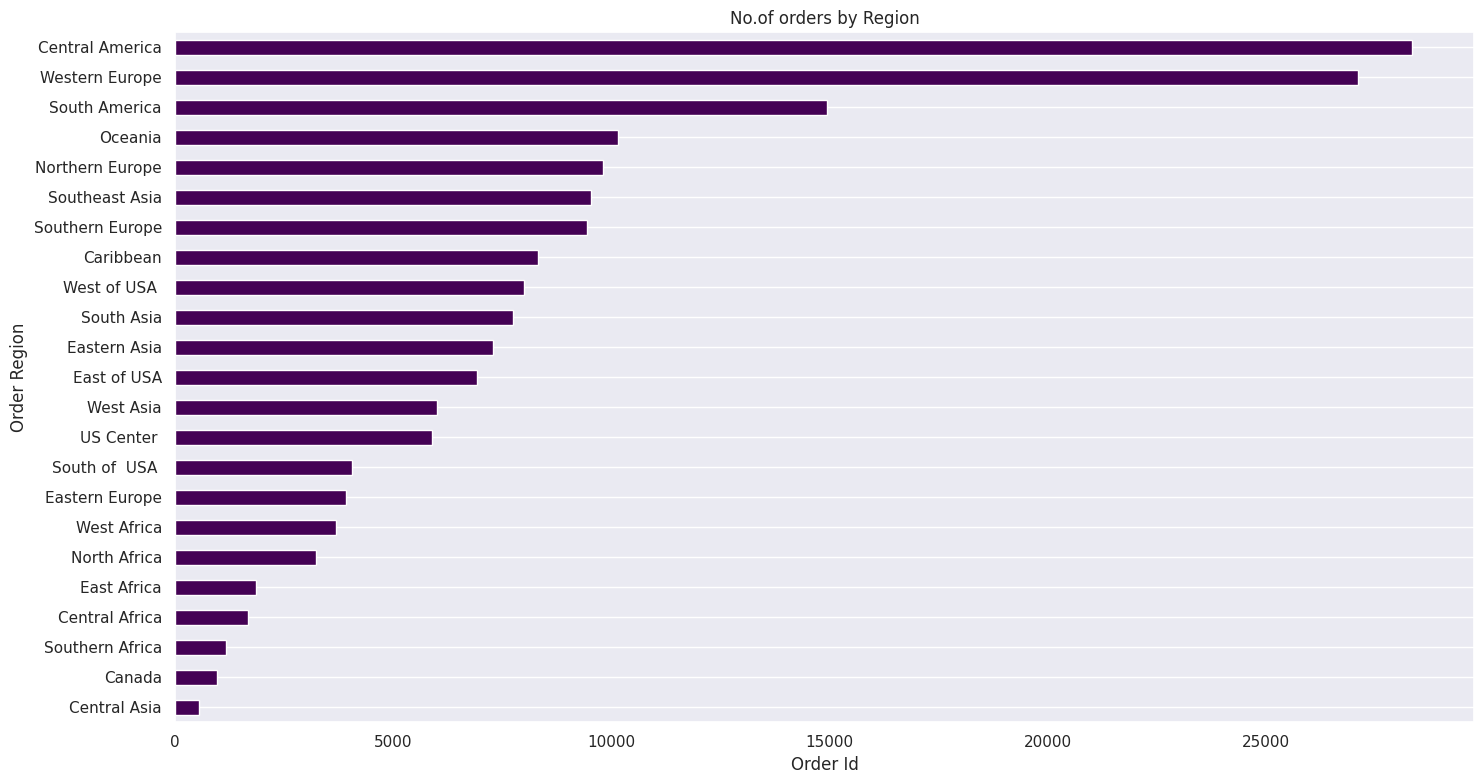

In [289]:
df_grouped = df.groupby(['Order Region'])['Order Id'].count().sort_values(ascending=True)

df_grouped.plot(kind='barh', colormap='viridis', figsize=(15, 8))

plt.ylabel("Order Region")
plt.xlabel("Order Id")
plt.title("No.of orders by Region")
plt.grid(axis='x')
plt.tight_layout()

plt.show()

####Top 10 order profit by Country

In [290]:
df_grouped = df.groupby(['Order Country'])['Order Profit Per Order'].sum().reset_index().sort_values(by='Order Profit Per Order', ascending=False)
df_grouped = df_grouped.head(10)
fig = px.bar(df_grouped, x='Order Profit Per Order', y='Order Country', color='Order Country', text_auto=True)
fig.update_layout(width=1000, height=500)
fig.show()

#Sales

####Top 10 sales by country

In [291]:
df_grouped = df.groupby(['Order Country'])['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
df_grouped = df_grouped.head(10)
fig = px.bar(df_grouped, x='Sales', y='Order Country', color='Order Country', text_auto=True)
fig.update_layout(width=1000, height=500)
fig.show()

#### Top 10 sales by Category

In [292]:
df_grouped = df.groupby(['Category Name'])['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
df_grouped = df_grouped.head(10)
fig = px.bar(df_grouped, x='Sales', y='Category Name', color='Category Name', text_auto=True)
fig.update_layout(width=1000, height=500)  # Set width and height in pixels
fig.show()

####Sales by Delivery Status

In [293]:
df_grouped = df.groupby(['Delivery Status'])['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
df_grouped = df_grouped.head(50)
fig = px.bar(df_grouped, x='Sales', y='Delivery Status', color='Delivery Status', text_auto=True)
fig.update_layout(width=1000, height=300)
fig.show()

####Sales by transaction type

In [294]:
df_grouped = df.groupby(['Type'])['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
df_grouped = df_grouped.head(50)
fig = px.bar(df_grouped, x='Sales', y='Type', color='Type', text_auto=True)
fig.update_layout(width=1000, height=300)
fig.show()

####Sales trend

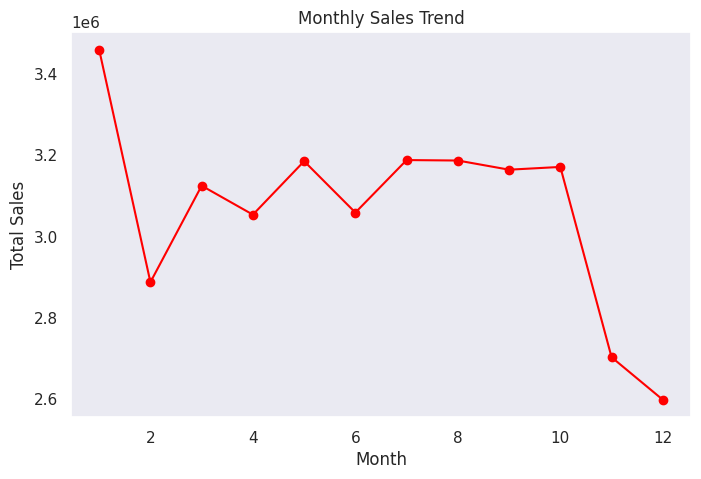

In [295]:
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
df_grouped = df.groupby(df['order date (DateOrders)'].dt.month)['Sales'].sum()

df_grouped.plot(kind='line', marker='o', color='red', figsize=(8,5))
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.grid()
plt.show()


#Prediction of Fraudulent

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category Id                    180519 non-null  int64         
 8   Category Name                  180519 non-null  object        
 9   Customer City                  180519 non-null  object        
 10  Customer Country               180519 non-null  object        
 11  

In [297]:
print(df.isnull().sum()/len(df)*100)

Type                               0.000000
Days for shipping (real)           0.000000
Days for shipment (scheduled)      0.000000
Benefit per order                  0.000000
Sales per customer                 0.000000
Delivery Status                    0.000000
Late_delivery_risk                 0.000000
Category Id                        0.000000
Category Name                      0.000000
Customer City                      0.000000
Customer Country                   0.000000
Customer Email                     0.000000
Customer Fname                     0.000000
Customer Id                        0.000000
Customer Lname                     0.004432
Customer Password                  0.000000
Customer Segment                   0.000000
Customer State                     0.000000
Customer Street                    0.000000
Customer Zipcode                   0.001662
Department Id                      0.000000
Department Name                    0.000000
Latitude                        

In [298]:
df['Order Status'].unique()

array(['COMPLETE', 'PENDING', 'CLOSED', 'PENDING_PAYMENT', 'CANCELED',
       'PROCESSING', 'SUSPECTED_FRAUD', 'ON_HOLD', 'PAYMENT_REVIEW'],
      dtype=object)

In [299]:
df['Order Status'] = df['Order Status'].apply(lambda x: 'Fraud' if x == 'SUSPECTED_FRAUD' else 'Non-Fraud')

In [300]:
df['Order Status'].unique()

array(['Non-Fraud', 'Fraud'], dtype=object)

In [301]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category Id                    180519 non-null  int64         
 8   Category Name                  180519 non-null  object        
 9   Customer City                  180519 non-null  object        
 10  Customer Country               180519 non-null  object        
 11  

#Label Encoding

In [302]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
encoder = LabelEncoder()

# Encode categorical columns
categorical_cols = ['Type', 'Delivery Status', 'Category Name','Customer City','Customer Country','Customer Country','Customer Email','Customer Fname','Customer Lname','Customer Password',
 'Customer Segment','Customer State','Customer Street','Department Name','Market','Order City','Order Country','Order Region','Order State','Order Status', 'Product Image',
 'Product Name','shipping date (DateOrders)','Shipping Mode']
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

print(df.head())


   Type  Days for shipping (real)  Days for shipment (scheduled)  Benefit per order  Sales per customer  Delivery Status  Late_delivery_risk  Category Id  Category Name  Customer City  Customer Country  Customer Email  Customer Fname  Customer Id  Customer Lname  Customer Password  Customer Segment  Customer State  Customer Street  Customer Zipcode  Department Id  Department Name   Latitude   Longitude  Market  Order City  Order Country  Order Customer Id order date (DateOrders)  Order Id  Order Item Cardprod Id  Order Item Discount  Order Item Discount Rate  Order Item Id  Order Item Product Price  Order Item Profit Ratio  Order Item Quantity   Sales  Order Item Total  Order Profit Per Order  Order Region  Order State  Order Status  Order Zipcode  Product Card Id  Product Category Id  Product Description  Product Image  Product Name  Product Price  Product Status  shipping date (DateOrders)  Shipping Mode
0     1                         3                              4          91.250

In [303]:
correlation = df.corr()['Order Status'].sort_values(ascending=False)
low_corr_features = correlation[abs(correlation) < 0.1].index

#df.drop(columns=low_corr_features, inplace=True)
correlation


,Order Status
Order Status,1.000000
Late_delivery_risk,0.167158
Customer Zipcode,0.006114
Order State,0.006105
Customer Segment,0.005935
Order City,0.005889
Order Country,0.004928
Shipping Mode,0.004641
Latitude,0.003907
Customer Fname,0.003689


In [304]:
#drop variables with NaN correlation
df.drop(columns=['Customer Email', 'Customer Password', 'Product Description', 'Product Status'], inplace=True)
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Fname,Customer Id,Customer Lname,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
0,1,3,4,91.250000,314.640015,0,0,73,40,66,1,109,20755,482,0,36,3683,725.0,2,4,18.251453,-66.037056,3,331,70,20755,2018-01-31 22:56:00,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,15,475,1,NaN,1360,73,78,78,327.75,27149,3
1,3,5,4,-249.089996,311.359985,1,1,73,40,66,1,311,19492,615,0,36,1400,725.0,2,4,18.279451,-66.037064,3,391,69,19492,2018-01-13 12:27:00,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,13,841,1,NaN,1360,73,78,78,327.75,2209,3
2,0,4,4,-247.779999,309.720001,3,0,73,40,452,0,249,19491,626,0,5,6217,95125.0,2,4,37.292233,-121.881279,3,391,69,19491,2018-01-13 12:06:00,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,13,841,1,NaN,1360,73,78,78,327.75,1980,3
3,1,3,4,22.860001,304.809998,0,0,73,40,285,0,707,19490,989,2,5,1803,90027.0,2,4,34.125946,-118.291016,3,3226,8,19490,2018-01-13 11:45:00,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,11,835,1,NaN,1360,73,78,78,327.75,1752,3
4,2,2,4,134.210007,298.250000,0,0,73,40,66,1,570,19489,454,1,36,6345,725.0,2,4,18.253769,-66.037048,3,3226,8,19489,2018-01-13 11:24:00,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,11,835,1,NaN,1360,73,78,78,327.75,1528,3


#Import RandomForest

####split the data into independent and dependent variable

In [305]:
from sklearn.ensemble import RandomForestClassifier
# Convert 'order date (DateOrders)' to ordinal before defining X
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
df['order_date_ordinal'] = df['order date (DateOrders)'].apply(lambda date: date.toordinal())
df = df.drop(columns=['order date (DateOrders)'])  # Drop original datetime column

# Define X (features) and y (target)
x = df.drop(columns=['Order Status'])
y = df['Order Status']
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x, y)

RandomForestClassifier(random_state=42)

#####Drop the variables with less feature importance

In [306]:
# Get Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=x.columns)
print(feature_importance.sort_values(ascending=False))


Delivery Status                  0.262097
Type                             0.072387
Days for shipping (real)         0.064847
Customer Street                  0.029348
Latitude                         0.027165
Order Customer Id                0.027053
Order City                       0.026949
Shipping Mode                    0.026653
Customer Id                      0.026358
shipping date (DateOrders)       0.025870
Order State                      0.023606
Longitude                        0.023598
Order Id                         0.023506
Order Item Id                    0.023397
Customer Lname                   0.022882
Late_delivery_risk               0.022433
Customer Fname                   0.021891
order_date_ordinal               0.021774
Customer City                    0.017725
Order Country                    0.017148
Customer Zipcode                 0.016544
Order Region                     0.013160
Days for shipment (scheduled)    0.012816
Customer State                   0

In [307]:
low_importance_features = ['Customer State','Benefit per order','Order Item Discount Rate','Order Zipcode','Order Item Total','Sales per customer',
                           'Days for shipment (scheduled)','Order Item Profit Ratio','Order Item Discount','Order Profit Per Order',
    'Customer Segment', 'Market', 'Sales', 'Product Name', 'Product Image',
    'Category Name', 'Order Item Product Price', 'Product Price', 'Product Card Id',
    'Product Category Id', 'Category Id', 'Order Item Cardprod Id', 'Department Name',
    'Order Item Quantity', 'Department Id', 'Customer Country'
]

x.drop(columns=low_importance_features, inplace=True)
x.head()


,Type,Days for shipping (real),Delivery Status,Late_delivery_risk,Customer City,Customer Fname,Customer Id,Customer Lname,Customer Street,Customer Zipcode,Latitude,Longitude,Order City,Order Country,Order Customer Id,Order Id,Order Item Id,Order Region,Order State,shipping date (DateOrders),Shipping Mode,order_date_ordinal
0,1,3,0,0,66,109,20755,482,3683,725.0,18.251453,-66.037056,331,70,20755,77202,180517,15,475,27149,3,736725
1,3,5,1,1,66,311,19492,615,1400,725.0,18.279451,-66.037064,391,69,19492,75939,179254,13,841,2209,3,736707
2,0,4,3,0,452,249,19491,626,6217,95125.0,37.292233,-121.881279,391,69,19491,75938,179253,13,841,1980,3,736707
3,1,3,0,0,285,707,19490,989,1803,90027.0,34.125946,-118.291016,3226,8,19490,75937,179252,11,835,1752,3,736707
4,2,2,0,0,66,570,19489,454,6345,725.0,18.253769,-66.037048,3226,8,19489,75936,179251,11,835,1528,3,736707


In [308]:
x.shape

(180519, 22)

#Standardization

In [309]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
#sc_x_test = sc.fit_transform(x_test)
x

array([[-0.6787717 , -0.30649053, -1.19453869, ..., -0.3562483 ,
         0.6950513 ,  1.94574002],
       [ 1.33199653,  0.92525096, -0.17291617, ..., -1.73373859,
         0.6950513 ,  1.88714888],
       [-1.68415582,  0.30938021,  1.87032886, ..., -1.74638675,
         0.6950513 ,  1.88714888],
       ...,
       [ 1.33199653,  0.92525096, -0.17291617, ..., -1.70512832,
         0.6950513 , -0.48579236],
       [ 0.32661241, -0.30649053, -1.19453869, ..., -1.73898564,
         0.6950513 , -0.48579236],
       [ 0.32661241,  0.30938021,  1.87032886, ..., -1.72683457,
         0.6950513 , -0.48579236]])

####Splittng the data into train and test

In [310]:
# split the data into training and test again for building the model and prediction
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=51)

In [311]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [312]:
print(x_train.shape)
print(x_test.shape)

(144415, 22)
(36104, 22)


In [313]:
y_pred_rf_train = rf.predict(x_train)
y_pred_rf_test = rf.predict(x_test)

In [314]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [315]:
print(confusion_matrix(y_train, y_pred_rf_train))
print("##########"*10)
print(confusion_matrix(y_test, y_pred_rf_test))

[[  3264      0]
 [     0 141151]]
####################################################################################################
[[  730    68]
 [   51 35255]]


In [316]:
print("Train Accuracy", classification_report(y_train, y_pred_rf_train))
print("*************"*5)
print("Test Accuracy", classification_report(y_test, y_pred_rf_test))

Train Accuracy               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3264
           1       1.00      1.00      1.00    141151

    accuracy                           1.00    144415
   macro avg       1.00      1.00      1.00    144415
weighted avg       1.00      1.00      1.00    144415

*****************************************************************
Test Accuracy               precision    recall  f1-score   support

           0       0.93      0.91      0.92       798
           1       1.00      1.00      1.00     35306

    accuracy                           1.00     36104
   macro avg       0.97      0.96      0.96     36104
weighted avg       1.00      1.00      1.00     36104



In [317]:
print("Train Accuracy", accuracy_score(y_train, y_pred_rf_train))
print("*************"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_rf_test))

Train Accuracy 1.0
*****************************************************************
Test Accuracy 0.9967039663195214


In [318]:
rf_train_predict = pd.DataFrame({'actual' : y_train,
                                 'predicted' : rf.predict(x_train)})
rf_train_predict.head()

,actual,predicted
78861,0,0
127829,1,1
157345,1,1
133714,1,1
79388,1,1


In [319]:
rf_test_predict = pd.DataFrame({'actual' : y_test,
                                 'predicted' : rf.predict(x_test)})
rf_test_predict.head()

,actual,predicted
8607,1,1
165450,1,1
16201,1,1
105986,1,1
66072,1,1


In [320]:
param = {'max_depth': [1,2,3,6,9 ], 'n_estimators':[50, 70, 100, 150,50],
          'max_features': [1,2,3,4,5], 'criterion' : ['gini', 'entropy'],'bootstrap':[True, False],
         'min_samples_leaf': [1,1,2,4,3]}

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rnd_search = RandomizedSearchCV(RandomForestClassifier(), param, n_iter =10, cv=9)
rnd_search.fit(x_train, y_train)
rnd_search.best_params_
final_model = RandomForestClassifier(n_estimators=100,min_samples_leaf=1, max_features=1,max_depth=2,
                                     criterion='gini',bootstrap=True)

final_model.fit(x_train, y_train)
y_pred_rf_train = final_model.predict(x_train)
y_pred_rf_test = final_model.predict(x_test)

print(confusion_matrix(y_train, y_pred_rf_train))
print("##########"*10)
print(confusion_matrix(y_test, y_pred_rf_test))

print("Train Accuracy", classification_report(y_train, y_pred_rf_train))
print("*************"*5)
print("Test Accuracy", classification_report(y_test, y_pred_rf_test))
print("Train Accuracy", accuracy_score(y_train, y_pred_rf_train))
print("*************"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_rf_test))

[[     0   3264]
 [     0 141151]]
####################################################################################################
[[    0   798]
 [    0 35306]]
Train Accuracy               precision    recall  f1-score   support

           0       0.00      0.00      0.00      3264
           1       0.98      1.00      0.99    141151

    accuracy                           0.98    144415
   macro avg       0.49      0.50      0.49    144415
weighted avg       0.96      0.98      0.97    144415

*****************************************************************
Test Accuracy               precision    recall  f1-score   support

           0       0.00      0.00      0.00       798
           1       0.98      1.00      0.99     35306

    accuracy                           0.98     36104
   macro avg       0.49      0.50      0.49     36104
weighted avg       0.96      0.98      0.97     36104

Train Accuracy 0.9773984696880518
**************************************************

#Sales Prediction

In [337]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Fname,Customer Id,Customer Lname,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,order_date_ordinal
0,1,3,4,91.250000,314.640015,0,0,73,40,66,1,109,20755,482,0,36,3683,725.0,2,4,18.251453,-66.037056,3,331,70,20755,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,15,475,1,NaN,1360,73,78,78,327.75,27149,3,736725
1,3,5,4,-249.089996,311.359985,1,1,73,40,66,1,311,19492,615,0,36,1400,725.0,2,4,18.279451,-66.037064,3,391,69,19492,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,13,841,1,NaN,1360,73,78,78,327.75,2209,3,736707
2,0,4,4,-247.779999,309.720001,3,0,73,40,452,0,249,19491,626,0,5,6217,95125.0,2,4,37.292233,-121.881279,3,391,69,19491,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,13,841,1,NaN,1360,73,78,78,327.75,1980,3,736707
3,1,3,4,22.860001,304.809998,0,0,73,40,285,0,707,19490,989,2,5,1803,90027.0,2,4,34.125946,-118.291016,3,3226,8,19490,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,11,835,1,NaN,1360,73,78,78,327.75,1752,3,736707
4,2,2,4,134.210007,298.250000,0,0,73,40,66,1,570,19489,454,1,36,6345,725.0,2,4,18.253769,-66.037048,3,3226,8,19489,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,11,835,1,NaN,1360,73,78,78,327.75,1528,3,736707


In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  int64  
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  int64  
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  int64  
 9   Customer City                  180519 non-null  int64  
 10  Customer Country               180519 non-null  int64  
 11  Customer Fname                 180519 non-null  int64  
 12  Customer Id                   

In [339]:
from sklearn.ensemble import RandomForestRegressor
x = df.drop(columns=['Sales'])
y = df['Sales']
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x, y)

RandomForestRegressor(random_state=42)

####Drop the variables with less feature importance

In [340]:
# Get Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=x.columns)
print(feature_importance.sort_values(ascending=False))

Sales per customer               4.935615e-01
Order Item Total                 4.720520e-01
Product Price                    1.311615e-02
Order Item Product Price         1.107686e-02
Order Item Discount              6.497462e-03
Product Name                     5.996156e-04
Product Image                    5.652216e-04
Category Name                    4.179629e-04
Department Name                  3.645836e-04
Product Category Id              3.096946e-04
Order Item Cardprod Id           2.803285e-04
Order Item Quantity              2.695805e-04
Department Id                    2.594310e-04
Category Id                      1.987438e-04
Product Card Id                  1.974850e-04
order_date_ordinal               4.571776e-05
Order Id                         4.565636e-05
Order Customer Id                3.968717e-05
Order Item Discount Rate         3.841878e-05
Order Item Id                    3.712240e-05
Customer Id                      2.029519e-05
Market                           2

In [341]:
low_importance_features = [
    "Customer Country", "Order Status", "Late_delivery_risk", "Order Zipcode",
    "Days for shipment (scheduled)", "Type", "Longitude", "Customer Segment",
    "Days for shipping (real)", "Order State", "Benefit per order",
    "Order Profit Per Order", "Order Item Profit Ratio", "Latitude",
    "Customer Street", "Customer Fname", "Delivery Status", "Shipping Mode",
    "Customer City", "Customer Lname", "Order City", "Order Region",
    "Customer State", "Customer Zipcode", "Order Country","Market"
]

x.drop(columns=low_importance_features, inplace=True)


In [342]:
x.head()

,Sales per customer,Category Id,Category Name,Customer Id,Department Id,Department Name,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Quantity,Order Item Total,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,shipping date (DateOrders),order_date_ordinal
0,314.640015,73,40,20755,2,4,20755,77202,1360,13.110000,0.04,180517,327.75,1,314.640015,1360,73,78,78,327.75,27149,736725
1,311.359985,73,40,19492,2,4,19492,75939,1360,16.389999,0.05,179254,327.75,1,311.359985,1360,73,78,78,327.75,2209,736707
2,309.720001,73,40,19491,2,4,19491,75938,1360,18.030001,0.06,179253,327.75,1,309.720001,1360,73,78,78,327.75,1980,736707
3,304.809998,73,40,19490,2,4,19490,75937,1360,22.940001,0.07,179252,327.75,1,304.809998,1360,73,78,78,327.75,1752,736707
4,298.250000,73,40,19489,2,4,19489,75936,1360,29.500000,0.09,179251,327.75,1,298.250000,1360,73,78,78,327.75,1528,736707


#Standardization

In [343]:
# feature scaling is required
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
#sc_x_test = sc.fit_transform(x_test)
x

array([[ 1.09570767,  2.63097796,  0.930534  , ...,  1.33482173,
        -0.3562483 ,  1.94574002],
       [ 1.06838396,  2.63097796,  0.930534  , ...,  1.33482173,
        -1.73373859,  1.88714888],
       [ 1.05472236,  2.63097796,  0.930534  , ...,  1.33482173,
        -1.74638675,  1.88714888],
       ...,
       [ 1.73997497,  0.84069899, -0.6182915 , ...,  1.85173952,
        -1.70512832, -0.48579236],
       [ 1.70665367,  0.84069899, -0.6182915 , ...,  1.85173952,
        -1.73898564, -0.48579236],
       [ 1.67333237,  0.84069899, -0.6182915 , ...,  1.85173952,
        -1.72683457, -0.48579236]])

In [344]:
#!pip install -U scikit-learn # Update scikit-learn to the latest version
from sklearn.ensemble import RandomForestRegressor # Import the RandomForestRegressor class

In [345]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

In [346]:
# split the data into training and test again for building the model and prediction
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=51)

In [347]:
print(x_train.shape)
print(x_test.shape)

(144415, 22)
(36104, 22)


In [348]:
y_pred_rf_reg_train = rf_reg.predict(x_train)
y_pred_rf_reg_test = rf_reg.predict(x_test)

In [349]:
from sklearn.metrics import r2_score # Import the r2_score function
r2=r2_score(y_test, y_pred_rf_reg_test)
print(r2)

0.9999813627792268


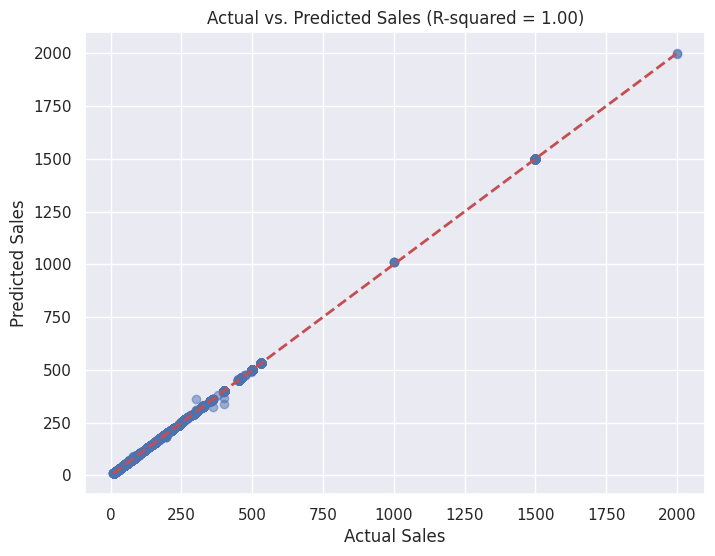

In [350]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf_reg_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Add a diagonal line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title(f"Actual vs. Predicted Sales (R-squared = {r2:.2f})")
plt.grid(True)
plt.show()